[0.00915876 5.4387194 ]
[0.0159172  9.45206035]
[0.01546098 9.18114367]
[0.01329962 7.89767255]


C:\Users\flitz\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


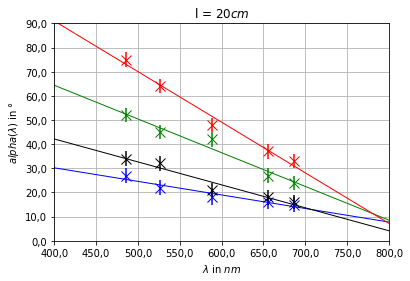

[-0.05615498 52.67528178]
[ -0.13959924 120.22395432]
[ -0.20948644 174.78751479]
[-0.09500455 80.15768234]


In [26]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O1d_1_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
x_dataPos = beamData[:,0]
y_dataPos1 = beamData[:,1]
y_dataPos2 = beamData[:,2]
y_dataPos3 = beamData[:,3]
y_dataPos4 = beamData[:,4]
    
xerr = [1 for i in range(0,s)]
yerr = [3 for i in range(0,s)]

x_dataFit = np.arange(400,800,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A, B):
    return A * np.asarray(x) + B

pFit1, pCov1 = curve_fit(fitCurve, x_dataPos, y_dataPos1, p0=[-1,4])
pFit2, pCov2 = curve_fit(fitCurve, x_dataPos, y_dataPos2, p0=[-1,4])
pFit3, pCov3 = curve_fit(fitCurve, x_dataPos, y_dataPos3, p0=[-1,4])
pFit4, pCov4 = curve_fit(fitCurve, x_dataPos, y_dataPos4, p0=[-1,4])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit1), label="Regressionskurve durch kleinste Quadrate - c = 150$g/L$", color="Blue",linewidth=1)
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit2), label="Regressionskurve durch kleinste Quadrate - c = 250$g/L$", color="Green",linewidth=1)
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit3), label="Regressionskurve durch kleinste Quadrate - c = 350$g/L$", color="Red",linewidth=1)
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit4), label="Regressionskurve durch kleinste Quadrate - $c_{alpha}$ in g/L$", color="Black",linewidth=1)
perr1 = np.sqrt(np.diag(pCov1))
perr2 = np.sqrt(np.diag(pCov2))
perr3 = np.sqrt(np.diag(pCov3))
perr4 = np.sqrt(np.diag(pCov4))
print(perr1)
print(perr2)
print(perr3)
print(perr4)

plt.errorbar(x_dataPos,y_dataPos1,yerr,xerr,fmt='x',markersize=10,label="Messungen mit Fehler - c = 150$g/L$",color="Blue")
plt.errorbar(x_dataPos,y_dataPos2,yerr,xerr,fmt='x',markersize=10,label="Messungen mit Fehler - c = 250$g/L$",color="Green")
plt.errorbar(x_dataPos,y_dataPos3,yerr,xerr,fmt='x',markersize=10,label="Messungen mit Fehler - c = 350$g/L$",color="Red")
plt.errorbar(x_dataPos,y_dataPos4,yerr,xerr,fmt='x',markersize=10,label="Messungen mit Fehler - $c_{alpha}$ in g/L$",color="Black")
plt.xlabel("$\lambda$ in $nm$")
plt.ylabel("$alpha$($\lambda$) in $°$")
plt.title("l = 20$cm$")
plt.axis([400,800, 0, 90])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
#plt.legend()
plt.grid(True)
plt.show()

print(pFit1)
print(pFit2)
print(pFit3)
print(pFit4)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve

[3.05292164e-06 1.81290653e-03]
[3.1834405e-06 1.8904121e-03]
[2.20871148e-06 1.31159194e-03]
[0.01329962 7.89767255]


C:\Users\flitz\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


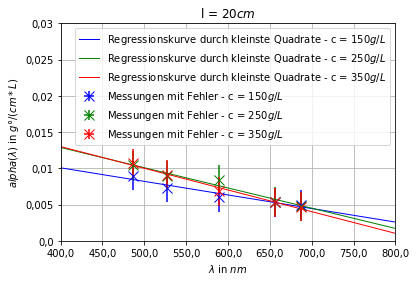

[-1.87183261e-05  1.75584274e-02]
[-2.79198488e-05  2.40447909e-02]
[-2.99266347e-05  2.49696450e-02]


In [25]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O1d_1_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
x_dataPos = beamData[:,0]
y_dataPos1 = []
for i in range(0,s):
    y_dataPos1.append(beamData[i,1]/(150*20))
y_dataPos2 = []
for i in range(0,s):
    y_dataPos2.append(beamData[i,2]/(250*20))
y_dataPos3 = []
for i in range(0,s):
    y_dataPos3.append(beamData[i,3]/(350*20))
#y_dataPos4 = beamData[:,4]
    
xerr = [1 for i in range(0,s)]
yerr = [0.002 for i in range(0,s)]

x_dataFit = np.arange(400,800,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A, B):
    return A * np.asarray(x) + B

pFit1, pCov1 = curve_fit(fitCurve, x_dataPos, y_dataPos1, p0=[-1,4])
pFit2, pCov2 = curve_fit(fitCurve, x_dataPos, y_dataPos2, p0=[-1,4])
pFit3, pCov3 = curve_fit(fitCurve, x_dataPos, y_dataPos3, p0=[-1,4])
#pFit4, pCov4 = curve_fit(fitCurve, x_dataPos, y_dataPos4, p0=[-1,4])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit1), label="Regressionskurve durch kleinste Quadrate - c = 150$g/L$", color="Blue",linewidth=1)
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit2), label="Regressionskurve durch kleinste Quadrate - c = 250$g/L$", color="Green",linewidth=1)
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit3), label="Regressionskurve durch kleinste Quadrate - c = 350$g/L$", color="Red",linewidth=1)
#plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit4), label="Regressionskurve durch kleinste Quadrate - $c_{alpha}$ in g/L$", color="Black",linewidth=1)
perr1 = np.sqrt(np.diag(pCov1))
perr2 = np.sqrt(np.diag(pCov2))
perr3 = np.sqrt(np.diag(pCov3))
#perr4 = np.sqrt(np.diag(pCov4))
print(perr1)
print(perr2)
print(perr3)
print(perr4)

plt.errorbar(x_dataPos,y_dataPos1,yerr,xerr,fmt='x',markersize=10,label="Messungen mit Fehler - c = 150$g/L$",color="Blue")
plt.errorbar(x_dataPos,y_dataPos2,yerr,xerr,fmt='x',markersize=10,label="Messungen mit Fehler - c = 250$g/L$",color="Green")
plt.errorbar(x_dataPos,y_dataPos3,yerr,xerr,fmt='x',markersize=10,label="Messungen mit Fehler - c = 350$g/L$",color="Red")
#plt.errorbar(x_dataPos,y_dataPos4,yerr,xerr,fmt='x',markersize=10,label="Messungen mit Fehler - $c_{alpha}$ in g/L$",color="Black")
plt.xlabel("$\lambda$ in $nm$")
plt.ylabel("$alpha$($\lambda$) in $g°/(cm*L)$")
plt.title("l = 20$cm$")
plt.axis([400,800, 0, 0.03])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit1)
print(pFit2)
print(pFit3)
#print(pFit4)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve